In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps #type: ignore
cmp = 'viridis'
cmap = colormaps[cmp]
# Directory containing the CSV files
directory = "C:/Ebooks/code/alpha_dy/layers_14/stats/fullstats/xmin_mid"
directory = "C:/Ebooks/code/LlaMAft/final/meta-llama/Llama-2-7b-hf/seed_42/alpaca/lr_2e-06/batch_1/alpha_dy/layers_14/stats/None"

dirtmp = directory
dirtmp = "C:/Ebooks/code/LlaMAft/final/meta-llama/Llama-2-7b-hf/seed_42/alpaca/lr_2e-06/batch_1/alpha_dy/layers_14/stats/xmin_mid"

# Get the list of files
flag = True
files = os.listdir(directory)

# Split files into freeze and step csvs
freeze_files = sorted([f for f in os.listdir(dirtmp) if f.startswith('freeze_') and f.endswith('.csv')])
step_files = sorted([f for f in files if f.startswith('step_') and f.endswith('.csv')], key=lambda x: int(x.split('_')[1].split('.')[0]))

freeze_files = freeze_files[:-2]
step_files = step_files[:-2]

# Find layers that are not frozen
not_frozen_layers = set()
for freeze_file in freeze_files:
    freeze_path = os.path.join(dirtmp, freeze_file)
    freeze_df = pd.read_csv(freeze_path)
    not_frozen_layers.update(freeze_df.loc[~freeze_df['freeze_layer'], 'name'].str.replace('.weight', '', regex=False))
    # current_not_frozen = set(freeze_df.loc[~freeze_df['freeze_layer'], 'name'].str.replace('.weight', '', regex=False))
    # if not_frozen_layers is None:
    #     not_frozen_layers = current_not_frozen
    # else:
    #     not_frozen_layers.intersection_update(current_not_frozen)


In [18]:
if freeze_files ==  []:
    flag = False
    tmp_path = os.path.join(directory, step_files[0])
    tmp_df = pd.read_csv(tmp_path)
    not_frozen_layers = tmp_df['longname'].str.replace('.weight', '', regex=False)

not_frozen_layers

{'model.layers.1.mlp.down_proj',
 'model.layers.16.mlp.down_proj',
 'model.layers.17.mlp.down_proj',
 'model.layers.18.mlp.down_proj',
 'model.layers.19.mlp.down_proj',
 'model.layers.2.mlp.down_proj',
 'model.layers.20.mlp.down_proj',
 'model.layers.21.mlp.down_proj',
 'model.layers.22.mlp.down_proj',
 'model.layers.23.mlp.down_proj',
 'model.layers.27.mlp.up_proj',
 'model.layers.28.mlp.up_proj',
 'model.layers.4.mlp.up_proj',
 'model.layers.5.mlp.up_proj'}

In [19]:
not_frozen_layers = list(not_frozen_layers)#[41:60]
# reverse the list
# not_frozen_layers = not_frozen_layers[::-1]

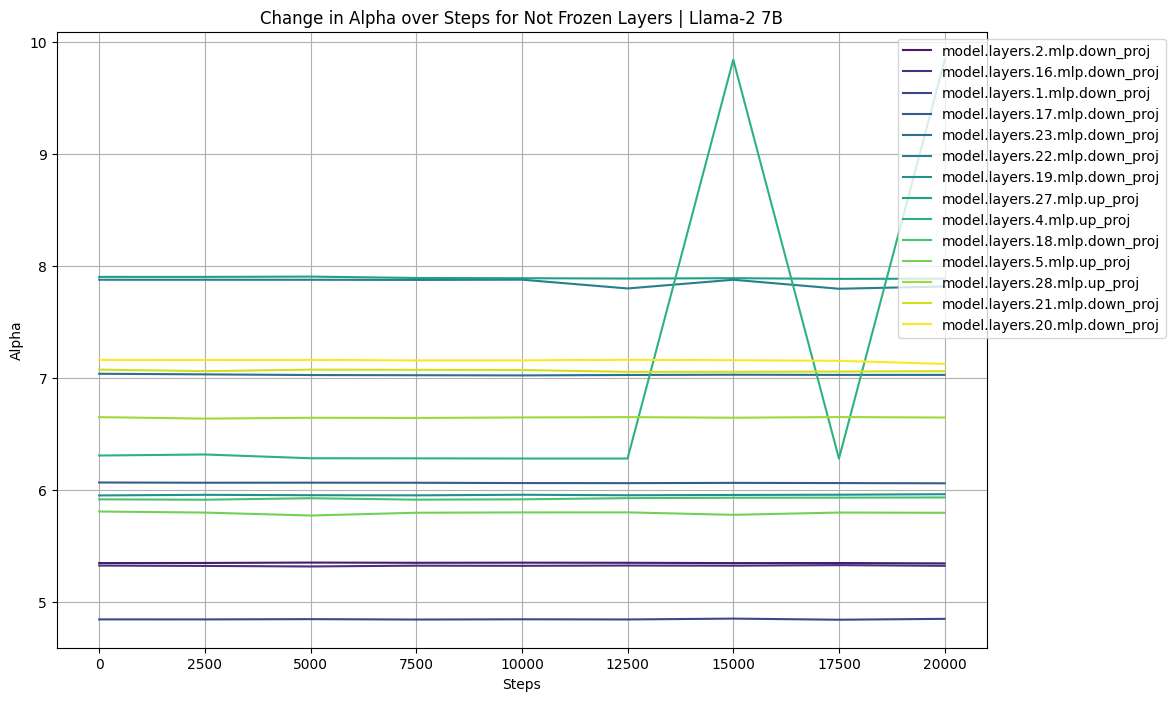

In [20]:
# Initialize a dictionary to hold the alpha values over the steps
alpha_values = {layer: [] for layer in not_frozen_layers}
steps = []
# Collect alpha values from step files
for step_file in step_files:
    step_path = os.path.join(directory, step_file)
    step_df = pd.read_csv(step_path)
    
    # Extract step number from filename
    step_number = int(step_file.split('_')[1].split('.')[0])
    steps.append(step_number)
    
    for layer in not_frozen_layers:
        filtered = step_df[step_df['longname'].str.contains(layer)]
        alpha = filtered['alpha']
        if not alpha.empty:
            alpha_values[layer].append(alpha)
        else:
            alpha_values[layer].append(None)

# Plot the change in alpha over the steps
plt.figure(figsize=(12, 8))

idx = 0
for layer, alphas in alpha_values.items():
    idx += 1
    plt.plot(steps, alphas, label=layer, c=cmap(idx/len(alpha_values.items())))

plt.xlabel('Steps')
plt.ylabel('Alpha')
plt.title('Change in Alpha over Steps for Not Frozen Layers | Llama-2 7B')

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()
